# For Delivery Time

In [75]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [76]:
dt=pd.read_csv("delivery_time (2).csv")
dt.columns

Index(['Delivery Time', 'Sorting Time'], dtype='object')

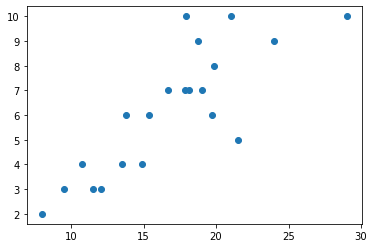

In [77]:
plt.scatter(dt['Delivery Time'],dt['Sorting Time'])

In [78]:
model1 = LinearRegression()
model1.fit(dt['Delivery Time'].values.reshape(-1,1),dt['Sorting Time'])

LinearRegression()

In [79]:
pred1 = model1.predict(dt['Delivery Time'].values.reshape(-1,1))

#### Adjusted R-Squared Value for model 1

In [80]:
model1.score(dt['Delivery Time'].values.reshape(-1,1),dt['Sorting Time'])# 0.6700

0.682271474841723

In [81]:
rmse1 = np.sqrt(np.mean((pred1-dt['Sorting Time'])**2)) 
model1.coef_

array([0.41374363])

In [82]:
model1.intercept_

-0.7566733660351286

#### Residuals Vs Fitted Values

In [83]:
import matplotlib.pyplot as plt

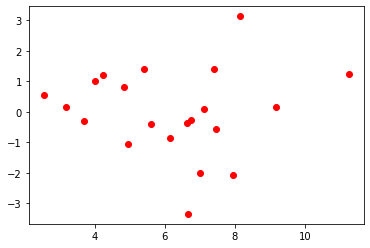

In [84]:
plt.scatter(pred1,(pred1-dt['Sorting Time']),c="r")

(array([1., 1., 1., 2., 5., 3., 3., 4., 0., 1.]),
 array([-3.35066242, -2.70171472, -2.05276701, -1.40381931, -0.7548716 ,
        -0.10592389,  0.54302381,  1.19197152,  1.84091922,  2.48986693,
         3.13881464]),
 <BarContainer object of 10 artists>)

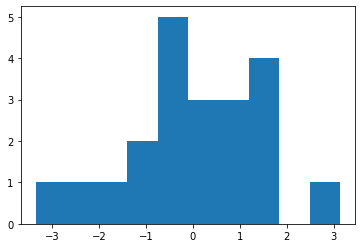

In [85]:
plt.hist(pred1-dt['Sorting Time'])

#### Fitting Quadratic Regression

In [86]:
dt["Delivery Time_sqrd"] = dt['Delivery Time']*dt['Delivery Time']
model2 = LinearRegression()
model2.fit(X = dt.iloc[:,[0,2]],y=dt['Sorting Time'])

LinearRegression()

In [87]:
pred2 = model2.predict(dt.iloc[:,[0,2]])

#### Adjusted R-Squared value for model 2

In [88]:
model2.score(dt.iloc[:,[0,2]],dt['Sorting Time'])

0.7162727530109552

In [89]:
model2.coef_

array([ 0.8940939 , -0.01364634])

In [90]:
model2.intercept_

-4.640095582578904

#### Residuals Vs Fitted values

In [91]:
import matplotlib.pyplot as plt

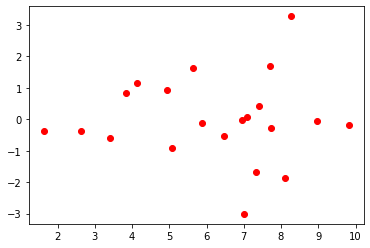

In [92]:
plt.scatter(pred2,(pred2-dt['Sorting Time']),c="r")

(array([1., 1., 1., 3., 8., 1., 3., 2., 0., 1.]),
 array([-3.00823901, -2.37992491, -1.75161081, -1.12329672, -0.49498262,
         0.13333148,  0.76164558,  1.38995968,  2.01827378,  2.64658788,
         3.27490198]),
 <BarContainer object of 10 artists>)

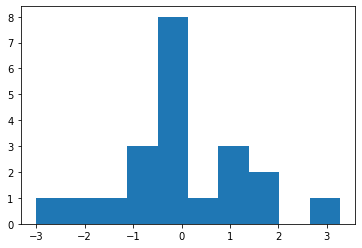

In [93]:
plt.hist(pred2-dt['Sorting Time'])

In [94]:
import pylab
import scipy.stats as st

((array([-1.84569542, -1.41352783, -1.14765351, -0.94487504, -0.77501005,
         -0.62504005, -0.48799157, -0.35957249, -0.23684388, -0.11759451,
          0.        ,  0.11759451,  0.23684388,  0.35957249,  0.48799157,
          0.62504005,  0.77501005,  0.94487504,  1.14765351,  1.41352783,
          1.84569542]),
  array([-3.00823901, -1.88216022, -1.67337684, -0.92631588, -0.60559149,
         -0.52332718, -0.37778585, -0.36071024, -0.27634935, -0.18794554,
         -0.13113929, -0.0421346 , -0.03669472,  0.07632571,  0.42135928,
          0.83725561,  0.94312634,  1.14094322,  1.64252516,  1.69533292,
          3.27490198])),
 (1.386905695609855, -1.4120728161620891e-15, 0.9740418427229265))

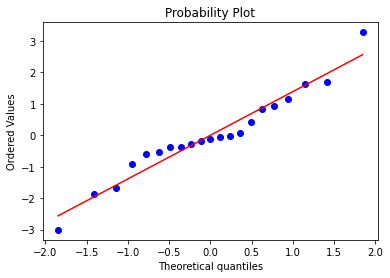

In [95]:
st.probplot(pred2-dt['Sorting Time'],dist="norm",plot=pylab)

In [96]:
dt["Sorting Time_sqrt"] = np.sqrt(dt['Sorting Time'])
model3 = LinearRegression()

In [97]:
model3.fit(X = dt.iloc[:,[0,2]],y=dt['Sorting Time'].apply(np.sqrt))

LinearRegression()

In [98]:
pred3 = model3.predict(dt.iloc[:,[0,2]])

#### Adjusted R-Squared value for model 3

In [99]:
model3.score(dt.iloc[:,[0,2]],dt['Sorting Time'].apply(np.sqrt))

0.7577881489466626

In [100]:
model3.coef_

array([ 0.22375258, -0.00386597])

In [101]:
model3.intercept_

-0.1392288379030604

#### Residuals Vs Fitted values

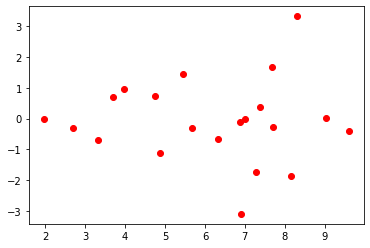

In [102]:
plt.scatter((pred3)**2,((pred3)**2-dt['Sorting Time']),c="r")

(array([1., 1., 1., 3., 8., 3., 1., 2., 0., 1.]),
 array([-3.09757539, -2.45583774, -1.81410008, -1.17236242, -0.53062477,
         0.11111289,  0.75285054,  1.3945882 ,  2.03632586,  2.67806351,
         3.31980117]),
 <BarContainer object of 10 artists>)

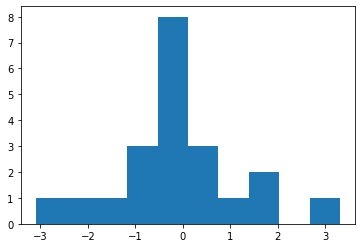

In [103]:
plt.hist((pred3)**2-dt['Sorting Time'])

((array([-1.84569542, -1.41352783, -1.14765351, -0.94487504, -0.77501005,
         -0.62504005, -0.48799157, -0.35957249, -0.23684388, -0.11759451,
          0.        ,  0.11759451,  0.23684388,  0.35957249,  0.48799157,
          0.62504005,  0.77501005,  0.94487504,  1.14765351,  1.41352783,
          1.84569542]),
  array([-3.09757539, -1.85078985, -1.72618228, -1.13153871, -0.68996514,
         -0.66287612, -0.40044779, -0.31853878, -0.31433374, -0.2850865 ,
         -0.12903228, -0.03055362, -0.00397624,  0.02421913,  0.37912592,
          0.6965875 ,  0.73870978,  0.97216019,  1.44861991,  1.68350897,
          3.31980117])),
 (1.38422662352949, -0.06562684984688795, 0.9725481989461069))

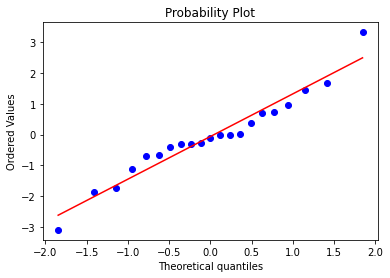

In [104]:
st.probplot((pred3)**2-dt['Sorting Time'],dist="norm",plot=pylab)

In [105]:
model4 = LinearRegression()
model4.fit(X =dt['Delivery Time'].values.reshape(-1,1),y=dt['Sorting Time'].apply(np.sqrt))

LinearRegression()

In [106]:
pred4 = model4.predict(dt['Delivery Time'].values.reshape(-1,1))

#### Adjusted R-Squared value for model 4

In [107]:
model4.score(dt['Delivery Time'].values.reshape(-1,1),dt['Sorting Time'].apply(np.sqrt))

0.695806227630867

In [108]:
model4.coef_

array([0.08767067])

In [109]:
model4.intercept_

0.9609339829284425

#### Residuals Vs Fitted values

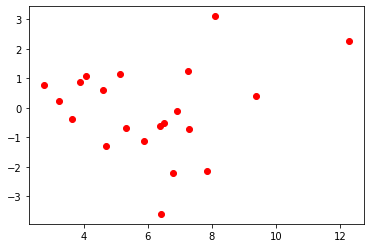

In [110]:
plt.scatter((pred4)**2,((pred4)**2-dt['Sorting Time']),c="r")

((array([-1.84569542, -1.41352783, -1.14765351, -0.94487504, -0.77501005,
         -0.62504005, -0.48799157, -0.35957249, -0.23684388, -0.11759451,
          0.        ,  0.11759451,  0.23684388,  0.35957249,  0.48799157,
          0.62504005,  0.77501005,  0.94487504,  1.14765351,  1.41352783,
          1.84569542]),
  array([-3.59789074, -2.21523033, -2.14869485, -1.30668637, -1.12771038,
         -0.71300551, -0.67923307, -0.62890896, -0.50438413, -0.37709248,
         -0.10056946,  0.21773762,  0.39440927,  0.59882889,  0.7632391 ,
          0.87753867,  1.0626923 ,  1.13237041,  1.24917776,  2.27369531,
          3.09888149])),
 (1.6050450963452165, -0.08242073596651411, 0.9879590704849802))

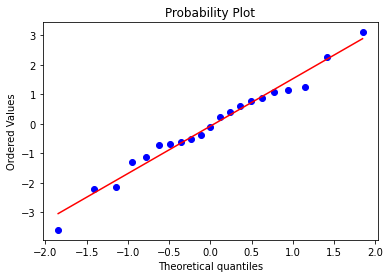

In [111]:
st.probplot((pred4)**2-dt['Sorting Time'],dist="norm",plot=pylab)

(array([1., 0., 2., 2., 5., 3., 4., 2., 1., 1.]),
 array([-3.59789074, -2.92821351, -2.25853629, -1.58885907, -0.91918185,
        -0.24950462,  0.4201726 ,  1.08984982,  1.75952704,  2.42920427,
         3.09888149]),
 <BarContainer object of 10 artists>)

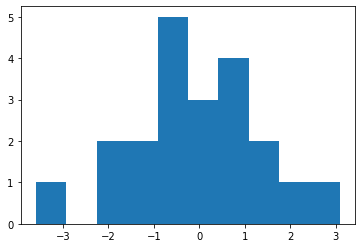

In [112]:
plt.hist((pred4)**2-dt['Sorting Time'])

.

# For Salary Data

In [113]:
df=pd.read_csv("Salary_Data (2).csv")

In [114]:
df.columns

Index(['YearsExperience', 'Salary'], dtype='object')

(array([4., 2., 5., 4., 3., 2., 2., 2., 3., 3.]),
 array([ 1.1 ,  2.04,  2.98,  3.92,  4.86,  5.8 ,  6.74,  7.68,  8.62,
         9.56, 10.5 ]),
 <BarContainer object of 10 artists>)

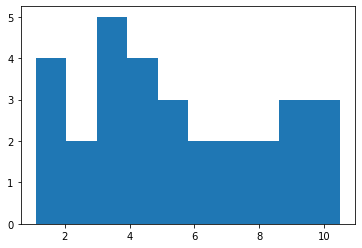

In [115]:
plt.hist(df['YearsExperience'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1d6502b02b0>,
 'caps': [<matplotlib.lines.Line2D at 0x1d6502b09d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d6502a2f40>],
 'medians': [<matplotlib.lines.Line2D at 0x1d6502bd130>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d6502bd4c0>],
 'means': []}

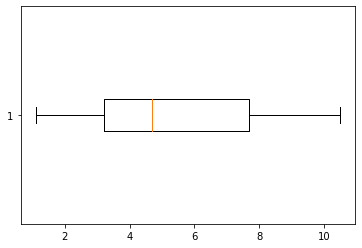

In [116]:
plt.boxplot(df['YearsExperience'],0,"rs",0)

(array([4., 2., 7., 4., 0., 2., 2., 2., 4., 3.]),
 array([ 37731.,  46197.,  54663.,  63129.,  71595.,  80061.,  88527.,
         96993., 105459., 113925., 122391.]),
 <BarContainer object of 10 artists>)

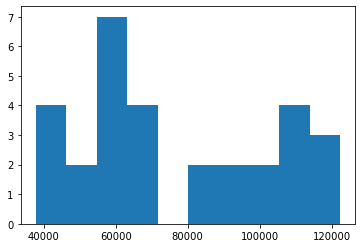

In [117]:
plt.hist(df['Salary'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1d65037ff10>,
 'caps': [<matplotlib.lines.Line2D at 0x1d65038f670>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d65037fb80>],
 'medians': [<matplotlib.lines.Line2D at 0x1d65038fd90>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d650399160>],
 'means': []}

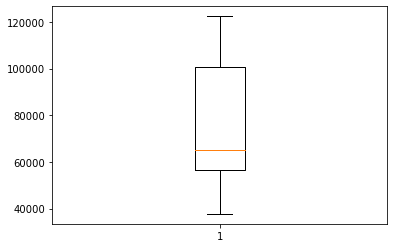

In [118]:
plt.boxplot(df['Salary'])

Text(0, 0.5, 'Salary')

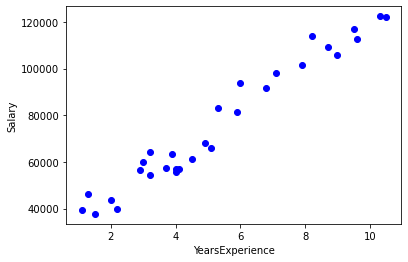

In [119]:
plt.plot(df['YearsExperience'],df['Salary'],"bo");plt.xlabel("YearsExperience");plt.ylabel("Salary")

In [120]:
df['Salary'].corr(df['YearsExperience'])

0.9782416184887598

In [121]:
np.corrcoef(df['Salary'],df['YearsExperience'])

array([[1.        , 0.97824162],
       [0.97824162, 1.        ]])

#### For preparing Linear Regression

In [122]:
import statsmodels.formula.api as smf

In [123]:
model=smf.ols("Salary~YearsExperience",data=df).fit()
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [124]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Mon, 28 Aug 2023   Prob (F-statistic):           1.14e-20
Time:                        16:48:22   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [125]:
model.conf_int(0.05)

,0,1
Intercept,21136.061314,30448.339084
YearsExperience,8674.118747,10225.805896


Text(0.5, 0, 'YearsExperience')

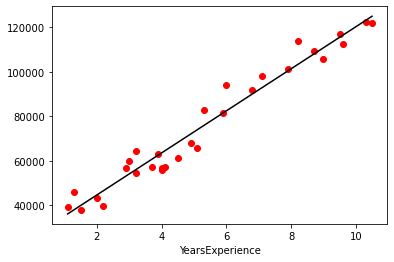

In [126]:
pred = model.predict(df.iloc[:,0])
import matplotlib.pylab as plt
plt.scatter(x=df['YearsExperience'],y=df['Salary'],color='red');plt.plot(df['YearsExperience'],pred,color='black');plt.xlabel('YearsExperience')

In [127]:
pred.corr(df['Salary'])

0.9782416184887601

#### Transforming variables for accuracy

In [128]:
model2 = smf.ols('Salary~np.log(YearsExperience)',data=df).fit()
model2.params

Intercept                  14927.97177
np.log(YearsExperience)    40581.98796
dtype: float64

In [129]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Mon, 28 Aug 2023   Prob (F-statistic):           3.25e-13
Time:                        16:48:23   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                1.493e+04   5156.226      2.895      0.007    4365.921    2.55e+04
np.log(YearsExperience)  4.058e+04   3172.453     12.792      0.000    3.41e+04    4.71e+04
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.908
Skew:                           0.156   Prob(JB):                        0.635
Kurtosis:                       2.207   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [130]:
print(model2.conf_int(0.01))

                                    0             1
Intercept                  679.965646  29175.977894
np.log(YearsExperience)  31815.666558  49348.309362


In [131]:
pred2 = model2.predict(pd.DataFrame(df['YearsExperience']))
pred2.corr(df['Salary'])

0.924061081788264

In [132]:
pred2

0      18795.848339
1      25575.235192
2      31382.551905
3      43057.262306
4      46925.138875
5      58136.050079
6      59511.842441
7      62130.943929
8      62130.943929
9      68022.718504
10     70159.105863
11     71186.552842
12     71186.552842
13     72188.628149
14     75966.422577
15     79422.295729
16     81045.791737
17     82606.829882
18     86959.066704
19     87641.132977
20     92720.502137
21     94472.514696
22     98805.371390
23    100317.918684
24    102719.920751
25    104095.713112
26    106289.868435
27    106714.814600
28    109571.007247
29    110351.454145
dtype: float64

Text(0.5, 0, 'YearsExperience')

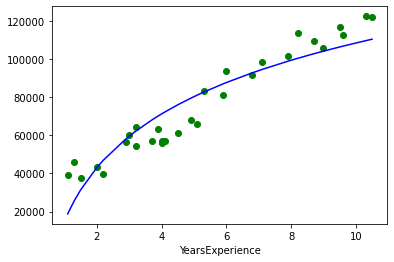

In [133]:
plt.scatter(x=df['YearsExperience'],y=df['Salary'],color='green');plt.plot(df['YearsExperience'],pred2,color='blue');plt.xlabel('YearsExperience')

#### Exponential transformation

In [134]:
model3 = smf.ols('np.log(Salary)~YearsExperience',data=df).fit()
model3.params

Intercept          10.507402
YearsExperience     0.125453
dtype: float64

In [135]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Salary)   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     383.6
Date:                Mon, 28 Aug 2023   Prob (F-statistic):           7.03e-18
Time:                        16:48:24   Log-Likelihood:                 28.183
No. Observations:                  30   AIC:                            -52.37
Df Residuals:                      28   BIC:                            -49.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          10.5074      0.038    273.327      0.000      10.429      10.586
YearsExperience     0.1255      0.006     19.585      0.000       0.112       0.139
==============================================================================
Omnibus:                        0.826   Durbin-Watson:                   1.438
Prob(Omnibus):                  0.661   Jarque-Bera (JB):                0.812
Skew:                           0.187   Prob(JB):                        0.666
Kurtosis:                       2.286   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [136]:
print(model3.conf_int(0.01)) 

                         0          1
Intercept        10.401175  10.613629
YearsExperience   0.107752   0.143153


In [137]:
pred_log = model3.predict(pd.DataFrame(df['YearsExperience']))
pred_log

0     10.645400
1     10.670491
2     10.695581
3     10.758308
4     10.783398
5     10.871215
6     10.883761
7     10.908851
8     10.908851
9     10.971578
10    10.996668
11    11.009213
12    11.009213
13    11.021759
14    11.071940
15    11.122121
16    11.147212
17    11.172302
18    11.247574
19    11.260119
20    11.360482
21    11.398117
22    11.498480
23    11.536116
24    11.598842
25    11.636478
26    11.699204
27    11.711750
28    11.799567
29    11.824657
dtype: float64

In [138]:
pred3=np.exp(pred_log)
pred3

0      41998.957468
1      43066.066794
2      44160.289228
3      47019.029189
4      48213.688474
5      52639.142472
6      53303.675386
7      54658.014935
8      54658.014935
9      58196.330788
10     59674.982903
11     60428.338456
12     60428.338456
13     61191.204604
14     64340.199291
15     67651.246149
16     69370.128712
17     71132.684635
18     76693.630780
19     77661.835040
20     85860.704208
21     89153.725393
22     98565.809591
23    102346.110512
24    108971.540758
25    113150.933364
26    120475.819601
27    121996.743836
28    133194.621344
29    136578.829694
dtype: float64

In [139]:
pred3.corr(df['Salary'])

0.9660469705377088

Text(0.5, 0, 'YearsExperience')

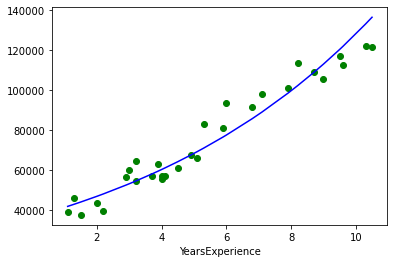

In [140]:
plt.scatter(x=df['YearsExperience'],y=df['Salary'],color='green');plt.plot(df['YearsExperience'],np.exp(pred_log),color='blue');plt.xlabel('YearsExperience')

In [141]:
resid_3 = pred3-df['Salary']

#### Predicted vs actual values

Text(0, 0.5, 'Actual')

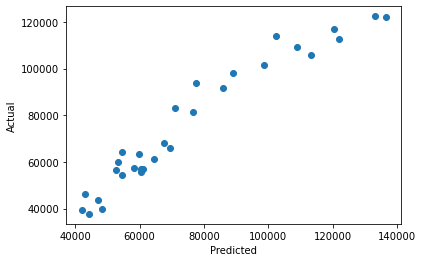

In [142]:
plt.scatter(x=pred3,y=df['Salary']);plt.xlabel("Predicted");plt.ylabel("Actual")

#### Quadratic Model

In [143]:
df["YearsExperience_sq"] =df['YearsExperience']*df['YearsExperience']
model_quad = smf.ols("Salary~YearsExperience+YearsExperience_sq",data=df).fit()
model_quad.params

Intercept             26214.932677
YearsExperience        9259.283888
YearsExperience_sq       16.392566
dtype: float64

In [144]:
model_quad.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     300.3
Date:                Mon, 28 Aug 2023   Prob (F-statistic):           3.59e-19
Time:                        16:48:25   Log-Likelihood:                -301.43
No. Observations:                  30   AIC:                             608.9
Df Residuals:                      27   BIC:                             613.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           2.621e+04   4554.674      5.756      0.000    1.69e+04    3.56e+04
YearsExperience     9259.2839   1811.007      5.113      0.000    5543.405     1.3e+04
YearsExperience_sq    16.3926    152.121      0.108      0.915    -295.734     328.520
==============================================================================
Omnibus:                        2.181   Durbin-Watson:                   1.649
Prob(Omnibus):                  0.336   Jarque-Bera (JB):                1.627
Skew:                           0.384   Prob(JB):                        0.443
Kurtosis:                       2.156   Cond. No.                         223.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [145]:
model_quad.conf_int(0.05)

,0,1
Intercept,16869.512653,35560.352701
YearsExperience,5543.405004,12975.162772
YearsExperience_sq,-295.734369,328.519502


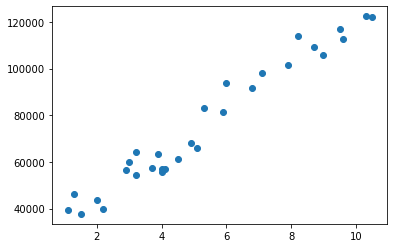

In [146]:
plt.scatter(df['YearsExperience'],df['Salary'])